# Linear SVM classifiers:

1) A linear SVM classifier predicts the class of a new instance x by first computing the decision function θ x = θ_1 x_1 + … + θ_n x_n , where x is the bias feature (always equal to 1). If the result is positive, then the predicted class ŷ is
the positive class (1); otherwise it is the negative class (0).

>NOTE:
Up to now, I have used the convention of putting all the model parameters in one vector θ, including the bias term θ and the input feature
weights θ to θ . This required adding a bias input x = 1 to all instances. Another very common convention is to separate the bias term b
(equal to θ ) and the feature weights vector w (containing θ to θ ). In this case, no bias feature needs to be added to the input feature
vectors, and the linear SVM’s decision function is equal to w x + b = w x + … + w x + b. I will use this convention throughout the rest
of this book.

2) This requires
finding the weights vector w and the bias term b that make the street, or margin, as wide as possible while limiting the number of margin violations. we need to keep w as small as possible. Note
that the bias term b has no influence on the size of the margin: tweaking it just shifts the margin around, without
affecting its size.

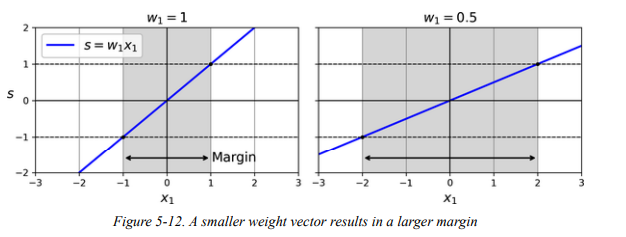

We also want to avoid margin violations, so we need the decision function to be greater than 1 for all positive
training instances and lower than –1 for negative training instances. If we define t^(i) = –1 for negative instances
(when y^(i) = 0) and t^(i) = 1 for positive instances (when y^(i) = 1), then we can write this constraint as t^(i) (w^T x^(i) + b)
≥ 1 for all instances.

# Hard-Margin Linear SVM Classifier Objective

## Objective Function:

$$
\min_{w, b} \ \frac{1}{2} w^\top w
$$

## Subject to:

$$
t^{(i)} \left( w^\top x^{(i)} + b \right) \geq 1, \ \forall i = 1, 2, \dots, m
$$

>NOTE:
We are minimizing ½ w w, which is equal to ½∥ w ∥ , rather than minimizing ∥ w ∥ (the norm of w). Indeed, ½∥ w ∥ has a nice,
simple derivative (it is just w), while ∥ w ∥ is not differentiable at w = 0. Optimization algorithms often work much better on
differentiable functions.

3) To get the soft margin objective, we need to introduce a slack variable ζ ≥ 0 for each instance: ζ measures how
much the i instance is allowed to violate the margin. We now have two conflicting objectives: make the slack
variables as small as possible to reduce the margin violations, and make ½ w w as small as possible to increase
the margin. This is where the C hyperparameter comes in: it allows us to define the trade-off between these two
objectives.


# Soft-Margin Linear SVM Classifier Objective

## Objective Function:

$$
\min_{w, b, \zeta} \ \frac{1}{2} w^\top w + C \sum_{i=1}^m \zeta^{(i)}
$$

## Subject to:

$$
t^{(i)} \left( w^\top x^{(i)} + b \right) \geq 1 - \zeta^{(i)}, \quad \zeta^{(i)} \geq 0, \quad \forall i = 1, 2, \dots, m
$$

4) ways to train an SVM classifier:
> Quadratic Programming solver
> Use gradient descent to minimize the hinge loss or the squared hinge loss.

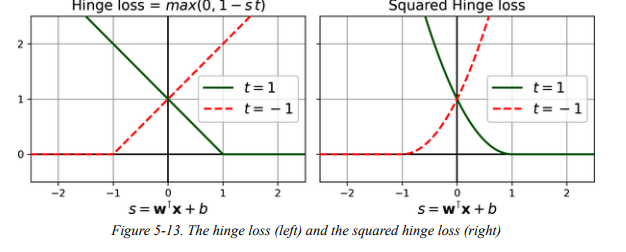

By default, LinearSVC uses the squared hinge loss, while SGDClassifier uses the hinge loss.
you choose the loss by setting the loss hyperparameter to "hinge" or "squared_hinge".

> The Dual Problem: 
use when Non-linearity, m<<n.
<br>
The solution to the dual problem typically gives a lower bound to
the solution of the primal problem, but under some conditions it can have the same solution as the primal problem.
Luckily, the SVM problem happens to meet these conditions, so you can choose to solve the primal problem or
the dual problem; both will have the same solution.
<br>

# Dual Form of the Linear SVM Objective

## Objective Function:

$$
\min_{\alpha} \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} x^{(i)^\top} x^{(j)} - \sum_{i=1}^m \alpha^{(i)}
$$

## Subject to:

$$
\alpha^{(i)} \geq 0, \quad \forall i = 1, 2, \dots, m
$$

$$
\sum_{i=1}^m \alpha^{(i)} = 0
$$


Once you find the vector 𝛂ˆ that minimizes this equation (using a QP solver), use Equation 5-4 to compute the wˆ
and ˆb that minimize the primal problem. In this equation, n represents the number of support vectors.


# From the Dual Solution to the Primal Solution

## Weight Vector \( \hat{w} \):

$$
\hat{w} = \sum_{i=1}^m \hat{\alpha}^{(i)} t^{(i)} x^{(i)}
$$

## Bias \( \hat{b} \):

$$
\hat{b} = \frac{1}{n_s} \sum_{i=1}^m \hat{\alpha}^{(i)} > 0 \left( t^{(i)} - \hat{w}^\top x^{(i)} \right)
$$


>Note: The dual problem is faster to solve than the primal one when the number of training instances is smaller than the
number of features. More importantly, the dual problem makes the kernel trick possible, while the primal problem
does not.


# Kernelized SVMs:
1) In machine learning, a kernel is a function
capable of computing the dot product ϕ(a) ϕ(b), based only on the original vectors a and b, without having to
compute (or even to know about) the transformation ϕ.

2)  
A couple of 2D vectors,
a and b, if we apply this second-degree polynomial mapping and then compute the dot product of the transformed
vectors.

if you apply the transformation ϕ to all training instances, then the dual problem (see
Equation 5-3) will contain the dot product ϕ(x^(i)) ϕ(x^(i) ). But if ϕ is the second-degree polynomial transformation
defined in Equation 5-5, then you can replace this dot product of transformed vectors simply by (x^(i).⊺ x^(j))^2 .

> MERCER’S THEOREM:
According to Mercer’s theorem, if a function K(a, b) respects a few mathematical conditions called Mercer’s
conditions (e.g., K must be continuous and symmetric in its arguments so that K(a, b) = K(b, a), etc.), then
there exists a function ϕ that maps a and b into another space (possibly with much higher dimensions) such
that K(a, b) = ϕ(a) ϕ(b). You can use K as a kernel because you know ϕ exists, even if you don’t know what
ϕ is. In the case of the Gaussian RBF kernel, it can be shown that ϕ maps each training instance to an infinitedimensional space, so it’s a good thing you don’t need to actually perform the mapping!
Note that some frequently used kernels (such as the sigmoid kernel) don’t respect all of Mercer’s conditions,
yet they generally work well in practice.

There is still one loose end we must tie up. Equation 5-4 shows how to go from the dual solution to the primal
solution in the case of a linear SVM classifier. But if you apply the kernel trick, you end up with equations that
include ϕ(x^(i)). In fact, wˆ must have the same number of dimensions as ϕ(x^(i)), which may be huge or even
infinite, so you can’t compute it. But how can you make predictions without knowing wˆ? Well, the good news is
that you can plug the formula for wˆ from Equation 5-4 into the decision function for a new instance x , and you
get an equation with only dot products between input vectors. This makes it possible to use the kernel trick.

# Making Predictions with a Kernelized SVM

The prediction function \( h_{w, \hat{b}} (\phi(x^{(n)})) \) is defined as:

$$
h_{w, \hat{b}} (\phi(x^{(n)})) = \hat{w}^\top \phi(x^{(n)}) + \hat{b}
$$

Expanding \( \hat{w} \):

$$
\hat{w} = \sum_{i=1}^m \hat{\alpha}^{(i)} t^{(i)} \phi(x^{(i)})
$$

Substitute \( \hat{w} \) into the prediction function:

$$
h_{w, \hat{b}} (\phi(x^{(n)})) = \left( \sum_{i=1}^m \hat{\alpha}^{(i)} t^{(i)} \phi(x^{(i)}) \right)^\top \phi(x^{(n)}) + \hat{b}
$$

Using the kernel function \( K(x^{(i)}, x^{(n)}) = \phi(x^{(i)})^\top \phi(x^{(n)}) \):

$$
h_{w, \hat{b}} (\phi(x^{(n)})) = \sum_{i=1}^m \hat{\alpha}^{(i)} t^{(i)} K(x^{(i)}, x^{(n)}) + \hat{b}
$$

For support vectors where \( \hat{\alpha}^{(i)} > 0 \):

$$
h_{w, \hat{b}} (\phi(x^{(n)})) = \sum_{i=1}^{m, \hat{\alpha}^{(i)} > 0} \hat{\alpha}^{(i)} t^{(i)} K(x^{(i)}, x^{(n)}) + \hat{b}
$$


3) Note that since α ≠ 0 only for support vectors, making predictions involves computing the dot product of the new
input vector x with only the support vectors, not all the training instances. Of course, you need to use the same
trick to compute the bias term ˆb 

# Using the Kernel Trick to Compute the Bias Term

The bias term \( b \) can be computed as:

$$
b = \frac{1}{n_s} \sum_{i=1, \hat{\alpha}^{(i)} > 0}^m \left( t^{(i)} - \hat{w}^\top \phi(x^{(i)}) \right)
$$

Expanding \( \hat{w} \) using the support vectors:

$$
b = \frac{1}{n_s} \sum_{i=1, \hat{\alpha}^{(i)} > 0}^m \left( t^{(i)} - \left( \sum_{j=1}^m \hat{\alpha}^{(j)} t^{(j)} \phi(x^{(j)}) \right)^\top \phi(x^{(i)}) \right)
$$

Using the kernel function \( K(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^\top \phi(x^{(j)}) \):

$$
b = \frac{1}{n_s} \sum_{i=1, \hat{\alpha}^{(i)} > 0}^m \left( t^{(i)} - \sum_{j=1, \hat{\alpha}^{(j)} > 0}^m \hat{\alpha}^{(j)} t^{(j)} K(x^{(i)}, x^{(j)}) \right)
$$

### Where:
- \( n_s \): The number of support vectors (\( \hat{\alpha}^{(i)} > 0 \)).
- \( t^{(i)} \): The label for the \( i \)-th data point.
- \( \hat{\alpha}^{(i)} \): The Lagrange multiplier for the \( i \)-th support vector.
- \( K(x^{(i)}, x^{(j)}) \): The kernel function applied to data points \( x^{(i)} \) and \( x^{(j)} \).

### Final Form:
$$
b = \frac{1}{n_s} \sum_{i=1, \hat{\alpha}^{(i)} > 0}^m \left( t^{(i)} - \sum_{j=1, \hat{\alpha}^{(j)} > 0}^m \hat{\alpha}^{(j)} t^{(j)} K(x^{(i)}, x^{(j)}) \right)
$$

>NOTE:
It is also possible to implement online kernelized SVMs, capable of incremental learning, as described in the papers “Incremental and
Decremental Support Vector Machine Learning” and “Fast Kernel Classifiers with Online and Active Learning”. These kernelized SVMs
are implemented in Matlab and C++. But for large-scale nonlinear problems, you may want to consider using random forests (see Chapter 7)
or neural networks (see Part II).




# Excersices:
1)  What is the fundamental idea behind support vector machines?
> The fundamental idea behind Support Vector Machines is to fit the widest possible "street" between the classes. In other words, the goal is to have the largest possible margin between the decision boundary that separates the two classes and the training instances. When performing soft margin classification, the SVM searches for a compromise between perfectly separating the two classes and having the widest possible street (i.e., a few instances may end up on the street). Another key idea is to use kernels when training on nonlinear datasets. SVMs can also be tweaked to perform linear and nonlinear regression, as well as novelty detection.

2) What is a support vector?
>After training an SVM, a support vector is any instance located on the "street" (see the previous answer), including its border. The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector (i.e., is off the street) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the street they won't affect the decision boundary. Computing the predictions with a kernelized SVM only involves the support vectors, not the whole training set.

3) Why is it important to scale the inputs when using SVMs?
> SVMs try to fit the largest possible "street" between the classes (see the first answer), so if the training set is not scaled, the SVM will tend to neglect small features (see Figure 5–2).

4) Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?
> You can use the decision_function() method to get confidence scores. These scores represent the distance between the instance and the decision boundary. However, they cannot be directly converted into an estimation of the class probability. If you set probability=True when creating an SVC, then at the end of training it will use 5-fold cross-validation to generate out-of-sample scores for the training samples, and it will train a LogisticRegression model to map these scores to estimated probabilities. The predict_proba() and predict_log_proba() methods will then be available.

5) How can you choose between LinearSVC, SVC, and SGDClassifier?
> All three classes can be used for large-margin linear classification. The SVC class also supports the kernel trick, which makes it capable of handling nonlinear tasks. However, this comes at a cost: the SVC class does not scale well to datasets with many instances. It does scale well to a large number of features, though. The LinearSVC class implements an optimized algorithm for linear SVMs, while SGDClassifier uses Stochastic Gradient Descent. Depending on the dataset LinearSVC may be a bit faster than SGDClassifier, but not always, and SGDClassifier is more flexible, plus it supports incremental learning.

6)  Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you
increase or decrease γ (gamma)? What about C?
> If an SVM classifier trained with an RBF kernel underfits the training set, there might be too much regularization. To decrease it, you need to increase gamma or C (or both).

7) What does it mean for a model to be ϵ-insensitive?
> A Regression SVM model tries to fit as many instances within a small margin around its predictions. If you add instances within this margin, the model will not be affected at all: it is said to be ϵ-insensitive.

8) What is the point of using the kernel trick?
> The kernel trick is mathematical technique that makes it possible to train a nonlinear SVM model. The resulting model is equivalent to mapping the inputs to another space using a nonlinear transformation, then training a linear SVM on the resulting high-dimensional inputs. The kernel trick gives the same result without having to transform the inputs at all.


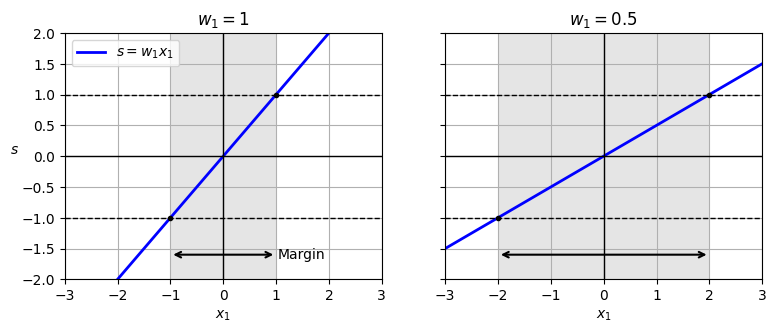

In [1]:
# extra code – this cell generates and saves Figure 5–12
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    half_margin = 1 / w

    plt.plot(x1, y, "b-", linewidth=2, label=r"$s = w_1 x_1$")
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    rect = patches.Rectangle((-half_margin, -2), 2 * half_margin, 4,
                             edgecolor='none', facecolor='gray', alpha=0.2)
    plt.gca().add_patch(rect)
    plt.plot([-3, 3], [1, 1], "k--", linewidth=1)
    plt.plot([-3, 3], [-1, -1], "k--", linewidth=1)
    plt.plot(half_margin, 1, "k.")
    plt.plot(-half_margin, -1, "k.")
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel("$x_1$")
    if ylabel:
        plt.ylabel("$s$", rotation=0, labelpad=5)
        plt.legend()
        plt.text(1.02, -1.6, "Margin", ha="left", va="center", color="k")

    plt.annotate(
        '', xy=(-half_margin, -1.6), xytext=(half_margin, -1.6),
        arrowprops={'ec': 'k', 'arrowstyle': '<->', 'linewidth': 1.5}
    )
    plt.title(f"$w_1 = {w}$")

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.grid()
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.grid()
plt.show()

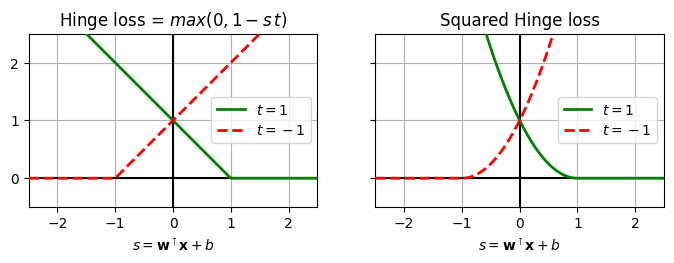

In [2]:
# extra code – this cell generates and saves Figure 5–13

s = np.linspace(-2.5, 2.5, 200)
hinge_pos = np.where(1 - s < 0, 0, 1 - s)  # max(0, 1 - s)
hinge_neg = np.where(1 + s < 0, 0, 1 + s)  # max(0, 1 + s)

titles = (r"Hinge loss = $max(0, 1 - s\,t)$", "Squared Hinge loss")

fix, axs = plt.subplots(1, 2, sharey=True, figsize=(8.2, 3))

for ax, loss_pos, loss_neg, title in zip(
        axs, (hinge_pos, hinge_pos ** 2), (hinge_neg, hinge_neg ** 2), titles):
    ax.plot(s, loss_pos, "g-", linewidth=2, zorder=10, label="$t=1$")
    ax.plot(s, loss_neg, "r--", linewidth=2, zorder=10, label="$t=-1$")
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlabel(r"$s = \mathbf{w}^\intercal \mathbf{x} + b$")
    ax.axis([-2.5, 2.5, -0.5, 2.5])
    ax.legend(loc="center right")
    ax.set_title(title)
    ax.set_yticks(np.arange(0, 2.5, 1))
    ax.set_aspect("equal")

plt.show()

#  Linear SVM classifier implementation using Batch Gradient Descent


In [1]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

X = iris.data[["petal length (cm)","petal width (cm)"]].values
y = (iris.target == 2)

In [5]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000,
                 random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)  # n feature weights
        b = 0

        t = np.array(y, dtype=np.float64).reshape(-1, 1) * 2 - 1
        X_t = X * t
        self.Js = []

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1/2 * (w * w).sum() + self.C * ((1 - X_t_sv.dot(w)).sum() - b * t_sv.sum())
            self.Js.append(J)

            w_gradient_vector = w - self.C * X_t_sv.sum(axis=0).reshape(-1, 1)
            b_derivative = -self.C * t_sv.sum()
                
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return self.decision_function(X) >= 0

In [6]:
C = 2
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000,
                      random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[ True],
       [False]])

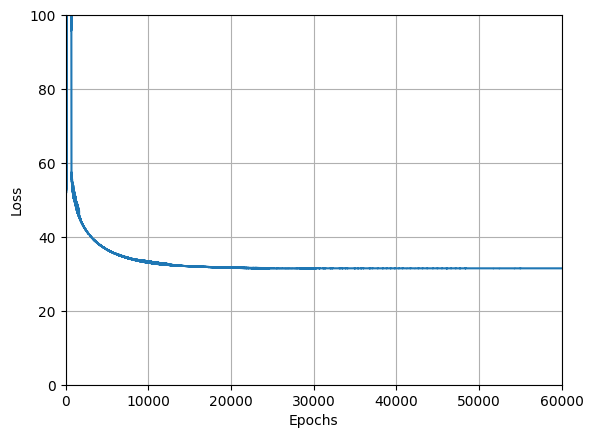

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [9]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [12]:
from sklearn.svm import SVC
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y)
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


In [13]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

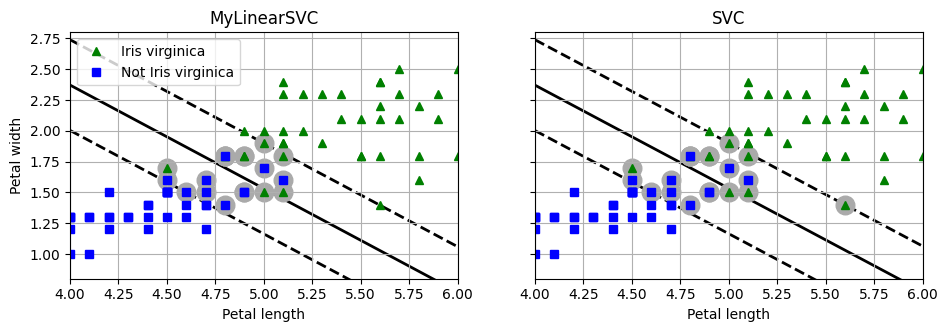

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("MyLinearSVC")
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length")
plt.title("SVC")
plt.axis([4, 6, 0.8, 2.8])
plt.grid()

plt.show()

[-12.52988101   1.94162342   1.84544824]


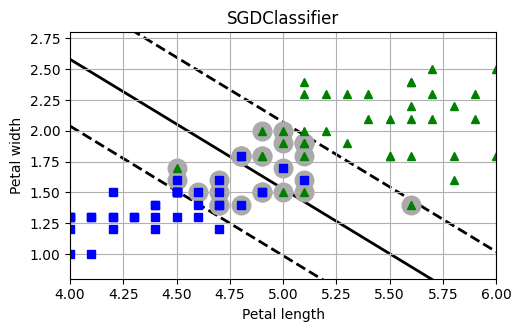

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, tol=1e-3,
                        random_state=42)
sgd_clf.fit(X, y)

m = len(X)
t = np.array(y).reshape(-1, 1) * 2 - 1  # -1 if y == 0, or +1 if y == 1
X_b = np.c_[np.ones((m, 1)), X]  # Add bias input x0=1
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5, 3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("SGDClassifier")
plt.axis([4, 6, 0.8, 2.8])
plt.grid()

plt.show()